# Marketstack

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
MARKETSTACK_ACCESS_KEY = context.params['marketstack']['access_key']

## Documentation example

In [51]:
params = {
    'access_key': MARKETSTACK_ACCESS_KEY,
    'limit': 10000,
}

api_result = requests.get('https://api.marketstack.com/v1/tickers/ulvr.xlon/eod', params)

print(api_result.status_code)

api_response = api_result.json()

200


In [10]:
for eod in api_response['data']['eod'][:10]:
    print(f"Ticker {eod['symbol']} had a day high of  {eod['high']} on {eod['date']}")

Ticker ULVR.XLON had a day high of  4110.0 on 2021-03-25T00:00:00+0000
Ticker ULVR.XLON had a day high of  4084.0 on 2021-03-24T00:00:00+0000
Ticker ULVR.XLON had a day high of  4085.0 on 2021-03-23T00:00:00+0000
Ticker ULVR.XLON had a day high of  4027.0 on 2021-03-22T00:00:00+0000
Ticker ULVR.XLON had a day high of  4015.0 on 2021-03-19T00:00:00+0000
Ticker ULVR.XLON had a day high of  4035.0 on 2021-03-18T00:00:00+0000
Ticker ULVR.XLON had a day high of  4039.0 on 2021-03-17T00:00:00+0000
Ticker ULVR.XLON had a day high of  4027.0 on 2021-03-16T00:00:00+0000
Ticker ULVR.XLON had a day high of  4008.0 on 2021-03-15T00:00:00+0000
Ticker ULVR.XLON had a day high of  3961.4622 on 2021-03-12T00:00:00+0000


In [11]:
len(api_response['data']['eod'])

7584

In [12]:
api_response['pagination']

{'limit': 10000, 'offset': 0, 'count': 7584, 'total': 7584}

In [38]:
df = pd.DataFrame.from_records(api_response['data']['eod'])
df.index = pd.to_datetime(df['date'])
df['year'] = df.index.year
df

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date,year
date,,,,,,,,,,,,,,
2021-03-25 00:00:00+00:00,4058.0,4110.0,4044.50,4060.00,2660921.0,None,None,4060.0000,None,None,ULVR.XLON,XLON,2021-03-25T00:00:00+0000,2021
2021-03-24 00:00:00+00:00,4078.0,4084.0,4024.00,4056.00,2506334.0,None,None,4056.0000,None,None,ULVR.XLON,XLON,2021-03-24T00:00:00+0000,2021
2021-03-23 00:00:00+00:00,3991.0,4085.0,3991.00,4074.00,3975417.0,None,None,4074.0000,None,None,ULVR.XLON,XLON,2021-03-23T00:00:00+0000,2021
2021-03-22 00:00:00+00:00,3958.0,4027.0,3929.28,4022.00,3813261.0,None,None,4022.0000,None,None,ULVR.XLON,XLON,2021-03-22T00:00:00+0000,2021
2021-03-19 00:00:00+00:00,3991.0,4015.0,3952.00,3952.00,9228393.0,None,None,3952.0000,None,None,ULVR.XLON,XLON,2021-03-19T00:00:00+0000,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-04-02 00:00:00+00:00,752.0,765.0,745.00,760.25,591791.0,None,None,179.2483,None,None,ULVR.XLON,XLON,1991-04-02T00:00:00+0000,1991
1991-03-28 00:00:00+00:00,756.0,765.0,752.00,765.00,619148.0,None,None,177.2122,None,None,ULVR.XLON,XLON,1991-03-28T00:00:00+0000,1991
1991-03-27 00:00:00+00:00,744.5,758.0,739.00,752.00,903156.0,None,None,174.2008,None,None,ULVR.XLON,XLON,1991-03-27T00:00:00+0000,1991


<AxesSubplot:xlabel='date'>

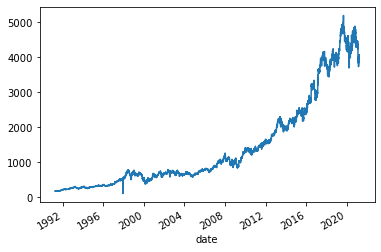

In [34]:
df['adj_close'].plot()

<AxesSubplot:xlabel='date'>

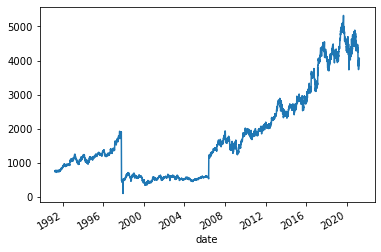

In [39]:
df['close'].plot()

## Review multiple tickers

In [63]:
params = {
    'access_key': MARKETSTACK_ACCESS_KEY,
    'limit': 10_000,
}

In [64]:
def download_eod(ticker):
    api_result = requests.get(f'https://api.marketstack.com/v1/tickers/{ticker}/eod', params)
    print(api_result.status_code)
    api_response = api_result.json()
    print(f"total pagination: {len(api_response['data']['eod'])}")
    print(api_response['pagination'])
    return api_response


In [104]:
tickers = ['AAPL', 'ULVR.XLON', 'JDW.XLON', 'PG', 'PEP', 'TSLA', 'VMID.XLON']

In [105]:
tickers_data = []
for ticker in tickers:
    print(ticker)
    api_response = download_eod(ticker)
    tickers_data.append(api_response)

AAPL
200
total pagination: 7559
{'limit': 10000, 'offset': 0, 'count': 7559, 'total': 7559}
ULVR.XLON
200
total pagination: 7584
{'limit': 10000, 'offset': 0, 'count': 7584, 'total': 7584}
JDW.XLON
200
total pagination: 6856
{'limit': 10000, 'offset': 0, 'count': 6856, 'total': 6856}
PG
200
total pagination: 7559
{'limit': 10000, 'offset': 0, 'count': 7559, 'total': 7559}
PEP
200
total pagination: 7559
{'limit': 10000, 'offset': 0, 'count': 7559, 'total': 7559}
TSLA
200
total pagination: 2705
{'limit': 10000, 'offset': 0, 'count': 2705, 'total': 2705}
VMID.XLON
200
total pagination: 25
{'limit': 10000, 'offset': 0, 'count': 25, 'total': 25}


In [106]:
def convert_to_pandas_dataframe(api_response):
    df = pd.DataFrame.from_records(api_response['data']['eod'])
    df.index = pd.to_datetime(df['date'])
    df['year'] = df.index.year
    return df

In [107]:
tickers_dataframes = []
for api_response in tickers_data:
    df = convert_to_pandas_dataframe(api_response)
    tickers_dataframes.append(df)
    print(df.iloc[0]['symbol'], len(df), min(df['year']))
    

AAPL 7559 1991
ULVR.XLON 7584 1991
JDW.XLON 6856 1992
PG 7559 1991
PEP 7559 1991
TSLA 2705 2010
VMID.XLON 25 2021


### APPL

In [108]:
appl = tickers_dataframes[0]

<AxesSubplot:xlabel='date'>

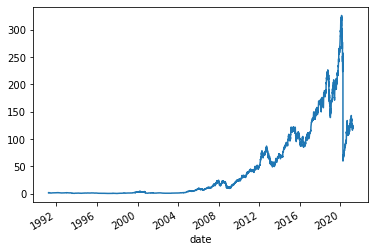

In [109]:
appl['adj_close'].plot()

In [110]:
appl[appl.year == 2020]

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date,year
date,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,134.08,134.7400,131.7200,132.69,99116586.0,134.740000,131.720000,132.690000,134.080000,99116586.0,AAPL,XNAS,2020-12-31T00:00:00+0000,2020
2020-12-30 00:00:00+00:00,135.58,135.9900,133.4000,133.72,96452124.0,135.990000,133.400000,133.720000,135.580000,96452124.0,AAPL,XNAS,2020-12-30T00:00:00+0000,2020
2020-12-29 00:00:00+00:00,138.05,138.7890,134.3409,134.87,121047324.0,138.789000,134.340900,134.870000,138.050000,121047324.0,AAPL,XNAS,2020-12-29T00:00:00+0000,2020
2020-12-28 00:00:00+00:00,133.99,137.3400,133.5100,136.69,123124632.0,137.340000,133.510000,136.690000,133.990000,123124632.0,AAPL,XNAS,2020-12-28T00:00:00+0000,2020
2020-12-24 00:00:00+00:00,131.32,133.4600,131.1000,131.97,54930064.0,133.460000,131.100000,131.970000,131.320000,54930064.0,AAPL,XNAS,2020-12-24T00:00:00+0000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-08 00:00:00+00:00,297.16,304.4399,297.1560,303.19,33090946.0,302.908263,295.661008,301.664651,295.664988,33090946.0,AAPL,XNAS,2020-01-08T00:00:00+0000,2020
2020-01-07 00:00:00+00:00,299.84,300.9000,297.4800,298.39,27877655.0,299.386172,295.983378,296.888800,298.331505,27877655.0,AAPL,XNAS,2020-01-07T00:00:00+0000,2020
2020-01-06 00:00:00+00:00,293.79,299.9600,292.7500,299.80,29644644.0,298.450901,291.277175,298.291706,292.311943,29644644.0,AAPL,XNAS,2020-01-06T00:00:00+0000,2020


### TSLA

In [112]:
tsla = tickers_dataframes[-2]

<AxesSubplot:xlabel='date'>

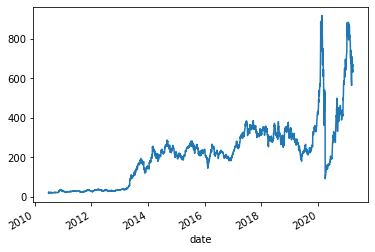

In [127]:
tsla['adj_close'].plot()

### JDW

In [120]:
jdw = tickers_dataframes[2]

<AxesSubplot:xlabel='date'>

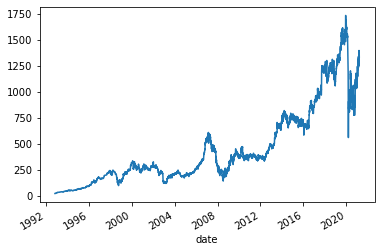

In [126]:
jdw['adj_close'].plot()

### ULVR

In [128]:
ulcr = tickers_dataframes[1]

<AxesSubplot:xlabel='date'>

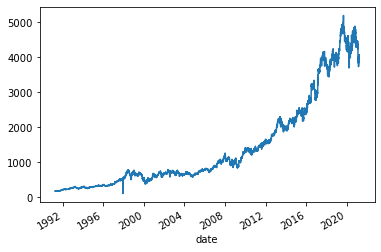

In [131]:
ulcr['adj_close'].plot()

## Count number of entries per year, per stock
Ensures all the data is available

In [136]:
ulcr.groupby('year').count()

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date
year,,,,,,,,,,,,,
1991,195,195,195,195,195,0,0,195,0,0,195,195,195
1992,254,254,254,254,254,0,0,254,0,0,254,254,254
1993,253,253,253,253,253,0,0,253,0,0,253,253,253
1994,252,252,252,252,252,0,0,252,0,0,252,252,252
1995,252,252,252,252,252,0,0,252,0,0,252,252,252
1996,254,254,254,254,254,0,0,254,0,0,254,254,254
1997,253,253,253,253,253,0,0,253,0,0,253,253,253
1998,252,252,252,252,252,0,0,252,0,0,252,252,252
1999,252,252,252,252,252,0,0,252,0,0,252,252,252


In [138]:
jdw.groupby('year').count()

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date
year,,,,,,,,,,,,,
1992,39,39,39,39,39,0,0,39,0,0,39,39,39
1993,238,238,238,238,238,0,0,238,0,0,238,238,238
1994,237,237,237,237,237,0,0,237,0,0,237,237,237
1995,247,247,247,247,247,0,0,247,0,0,247,247,247
1996,226,226,226,226,226,0,0,226,0,0,226,226,226
1997,89,89,89,89,89,0,0,89,0,0,89,89,89
1998,163,163,163,163,163,0,0,163,0,0,163,163,163
1999,252,252,252,252,252,0,0,252,0,0,252,252,252
2000,252,252,252,252,252,0,0,252,0,0,252,252,252


In [140]:
appl.groupby('year').count()

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,symbol,exchange,date
year,,,,,,,,,,,,,
1991,196,196,196,196,196,0,0,196,0,0,196,196,196
1992,254,254,254,254,254,0,0,254,0,0,254,254,254
1993,253,253,253,253,253,0,0,253,0,0,253,253,253
1994,252,252,252,252,252,0,0,252,0,0,252,252,252
1995,252,252,252,252,252,0,0,252,0,0,252,252,252
1996,254,254,254,254,254,0,0,254,0,0,254,254,254
1997,253,253,253,253,253,0,0,253,0,0,253,253,253
1998,252,252,252,252,252,0,0,252,0,0,252,252,252
1999,252,252,252,252,252,0,0,252,0,0,252,252,252


# Alpha Vantage

In [3]:
ALPHA_VANTAGE_ACCESS_KEY = context.params['alpha_vantage']['access_key']

In [4]:
from alpha_vantage.timeseries import TimeSeries

app = TimeSeries(ALPHA_VANTAGE_ACCESS_KEY)

### AAPL

In [157]:
response = app.get_daily_adjusted(symbol='AAPL', outputsize='full')

In [168]:
df = pd.DataFrame.from_dict(response[0], orient='index', dtype='float')

In [219]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-03-25,119.54,121.66,119.000,120.59,120.59,98844681.0,0.0,1.0
2021-03-24,122.82,122.90,120.065,120.09,120.09,88530485.0,0.0,1.0
2021-03-23,123.33,124.24,122.140,122.54,122.54,95467142.0,0.0,1.0
2021-03-22,120.33,123.87,120.260,123.39,123.39,111912284.0,0.0,1.0
2021-03-19,119.90,121.43,119.675,119.99,119.99,185549522.0,0.0,1.0


In [169]:
df.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
1999-11-05,84.62,88.37,84.00,88.31,0.679082,3721500.0,0.0,1.0
1999-11-04,82.06,85.37,80.62,83.62,0.643017,3384700.0,0.0,1.0
1999-11-03,81.62,83.25,81.00,81.50,0.626715,2932700.0,0.0,1.0
1999-11-02,78.00,81.69,77.31,80.25,0.617103,3564600.0,0.0,1.0
1999-11-01,80.00,80.69,77.37,77.62,0.596879,2487300.0,0.0,1.0


<AxesSubplot:>

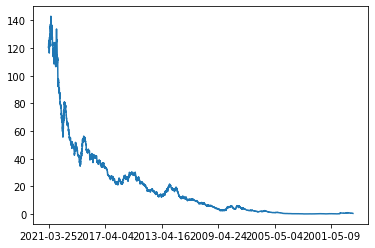

In [171]:
df['5. adjusted close'].plot()

In [173]:
df[df['7. dividend amount'] > 0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-02-05,137.35,137.42,135.86,136.76,136.760000,75693830.0,0.205,1.0
2020-11-06,118.32,119.20,116.13,118.69,118.512353,114457922.0,0.205,1.0
2020-08-07,452.82,454.70,441.17,444.45,110.754900,49511403.0,0.820,1.0
2020-05-08,305.64,310.35,304.29,310.13,77.140650,33511985.0,0.820,1.0
2020-02-07,322.37,323.40,318.00,320.03,79.393221,29421012.0,0.770,1.0


In [175]:
df[df['8. split coefficient'] > 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2020-08-31,127.58,131.00,126.00,129.04,128.624703,223505733.0,0.0,4.000000
2014-06-09,92.70,93.88,91.75,93.70,21.108575,75414997.0,0.0,7.000007
2005-02-28,44.68,45.14,43.96,44.86,1.379850,11635900.0,0.0,2.000000
2000-06-21,50.50,56.94,50.31,55.63,0.855562,4375000.0,0.0,2.000000


In [191]:
df[df['8. split coefficient'] < 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


### ULVR

In [161]:
response_xlon = app.get_daily_adjusted(symbol='ULVR.L', outputsize='full')

In [177]:
df_xlon = pd.DataFrame.from_dict(response_xlon[0], orient='index', dtype='float')

In [178]:
df_xlon.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2005-01-10,509.50,509.50,503.75,506.50,886.7171,3952289.0,0.0,1.0
2005-01-07,511.25,512.50,507.00,509.50,891.9692,4509922.0,0.0,1.0
2005-01-06,514.75,516.25,510.50,512.50,897.2209,3020221.0,0.0,1.0
2005-01-05,512.50,516.75,512.50,515.00,901.5978,3137466.0,0.0,1.0
2005-01-04,514.25,519.25,513.75,519.25,909.0381,6407626.0,0.0,1.0


<AxesSubplot:>

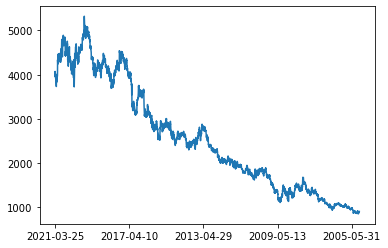

In [181]:
df_xlon['5. adjusted close'].plot()

In [186]:
df_xlon[df_xlon['7. dividend amount'] > 0].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-02-25,3808.0,3840.0,3800.000,3821.0,3821.0000,3333102.0,37.60,1.0
2020-10-29,4465.0,4508.0,4415.000,4463.0,4462.5629,4883166.0,37.46,1.0
2020-08-06,4610.0,4610.0,4530.000,4577.0,4576.1742,4311913.0,36.98,1.0
2020-05-14,4141.0,4169.0,4085.325,4109.0,4107.9328,3133387.0,36.14,1.0
2020-02-20,4603.5,4613.0,4552.500,4596.0,4594.4122,1623375.0,34.72,1.0


In [192]:
df_xlon[df_xlon['8. split coefficient'] > 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


In [188]:
df_xlon[df_xlon['8. split coefficient'] < 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2006-05-22,1178.0,1185.0,1148.0,1170.0,979.1541,5451267.0,0.0,0.45


### JDW

In [193]:
response_jdw = app.get_daily_adjusted(symbol='JDW.L', outputsize='full')

In [194]:
df_jdw = pd.DataFrame.from_dict(response_jdw[0], orient='index', dtype='float')

In [195]:
df_jdw.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2005-01-10,252.5,252.50,251.75,251.75,193.6830,126769.0,0.0,1.0
2005-01-07,251.5,253.00,251.00,253.00,194.6445,750420.0,0.0,1.0
2005-01-06,252.5,253.00,251.00,252.25,194.0679,1240041.0,0.0,1.0
2005-01-05,252.0,252.75,251.25,252.50,194.2604,574254.0,0.0,1.0
2005-01-04,253.0,256.00,253.00,253.25,194.8371,656680.0,0.0,1.0


<AxesSubplot:>

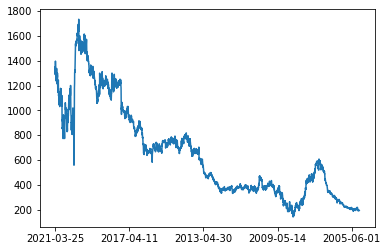

In [202]:
df_jdw['5. adjusted close'].plot()

In [200]:
df_jdw[df_jdw['7. dividend amount'] > 0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-10-24,1528.00,1528.0000,1474.000,1487.00,1487.0000,83104.0,8.000,1.0
2019-05-02,1367.00,1370.0000,1334.000,1334.00,1326.8472,85641.0,4.000,1.0
2018-10-25,1198.00,1241.0000,1180.000,1222.00,1211.9119,168748.0,8.000,1.0
2018-05-03,1127.00,1144.0000,1127.000,1143.00,1126.1125,89134.0,4.000,1.0
2017-10-26,1232.00,1255.0000,1220.200,1252.00,1229.2079,102597.0,8.000,1.0
2017-04-27,976.00,987.5000,974.500,987.50,963.2376,160291.0,4.000,1.0
2016-10-20,887.50,901.0000,885.000,901.00,875.3011,290032.0,8.000,1.0
2016-04-28,691.00,699.0000,679.615,694.50,668.6806,222198.0,4.000,1.0
2015-10-22,752.50,756.9800,745.000,753.00,720.8625,70143.0,8.000,1.0
2015-04-30,769.50,769.5000,746.500,761.00,720.8729,125506.0,4.000,1.0


In [198]:
df_jdw[df_jdw['8. split coefficient'] > 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


In [199]:
df_jdw[df_jdw['8. split coefficient'] < 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


### ISF

In [203]:
response_isf = app.get_daily_adjusted(symbol='ISF.L', outputsize='full')

In [204]:
df_isf = pd.DataFrame.from_dict(response_isf[0], orient='index', dtype='float')

In [205]:
df_isf.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2005-01-10,485.25,485.75,484.75,484.75,270.5803,603939.0,0.0,1.0
2005-01-07,485.75,487.25,484.50,484.50,270.4406,1617450.0,0.0,1.0
2005-01-06,482.25,484.50,482.25,482.25,269.1847,964734.0,0.0,1.0
2005-01-05,482.75,483.00,481.75,481.75,268.9054,2701840.0,0.0,1.0
2005-01-04,482.75,485.75,482.75,485.75,271.1381,1433020.0,0.0,1.0


<AxesSubplot:>

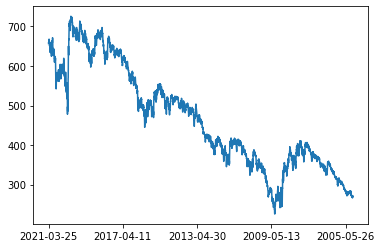

In [206]:
df_isf['5. adjusted close'].plot()

In [207]:
df_isf[df_isf['7. dividend amount'] > 0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-03-11,664.50,664.5000,658.4980,661.80,661.8000,9473088.0,5.62,1.0
2020-12-10,648.90,652.5000,644.7101,648.60,643.1235,10969389.0,3.45,1.0
2020-09-17,588.90,595.6000,588.4000,593.50,585.3565,7851673.0,5.73,1.0
2020-06-11,606.50,608.9879,595.6000,595.60,581.8355,11500605.0,4.26,1.0
2020-03-12,549.80,552.4000,516.0000,517.70,502.2794,19287527.0,6.35,1.0
...,...,...,...,...,...,...,...,...
2006-02-22,587.25,590.2500,586.2500,589.75,341.0976,1131140.0,1.92,1.0
2005-11-30,550.00,550.2500,545.0000,545.00,314.1887,2132911.0,2.88,1.0
2005-08-31,531.00,531.5000,528.0000,531.50,304.8141,2210541.0,5.52,1.0
2005-05-25,500.50,500.5000,498.5000,498.50,282.9223,2396059.0,6.35,1.0


In [208]:
df_isf[df_isf['8. split coefficient'] > 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


In [209]:
df_isf[df_isf['8. split coefficient'] < 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


### PEP

In [211]:
response_pep = app.get_daily_adjusted(symbol='PEP', outputsize='full')

In [212]:
df_pep = pd.DataFrame.from_dict(response_pep[0], orient='index', dtype='float')

In [213]:
df_pep.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
1999-11-05,33.00,34.06,33.00,33.81,20.081875,4080100.0,0.0,1.0
1999-11-04,34.25,34.56,32.06,33.00,19.600765,4683900.0,0.0,1.0
1999-11-03,33.81,34.31,33.75,34.25,20.343219,2898500.0,0.0,1.0
1999-11-02,33.63,34.31,33.56,33.69,20.010599,2682900.0,0.0,1.0
1999-11-01,34.44,34.56,33.56,33.56,19.933384,3635000.0,0.0,1.0


<AxesSubplot:>

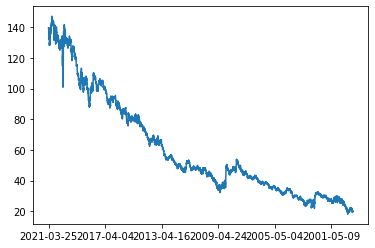

In [214]:
df_pep['5. adjusted close'].plot()

In [215]:
df_pep[df_pep['7. dividend amount'] > 0]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2021-03-04,129.2500,131.750,128.32,128.83,128.830000,9102794.0,1.0225,1.0
2020-12-03,143.0200,144.960,143.02,144.45,143.312555,4758137.0,1.0225,1.0
2020-09-03,142.7663,144.035,138.12,139.37,137.300663,6642417.0,1.0225,1.0
2020-06-04,131.5900,133.560,130.18,130.57,127.694482,5229737.0,1.0225,1.0
2020-03-05,138.8100,141.420,136.67,138.10,134.009218,6579119.0,0.9550,1.0
...,...,...,...,...,...,...,...,...
2000-12-06,44.1300,45.440,43.94,45.31,27.397374,7443800.0,0.1400,1.0
2000-09-06,42.2500,42.500,41.31,41.94,25.281537,2212800.0,0.1400,1.0
2000-06-07,40.5600,41.810,40.38,41.31,24.818924,3652200.0,0.1400,1.0
2000-03-08,31.0000,31.500,30.06,30.50,18.262417,5159800.0,0.1350,1.0


In [216]:
df_pep[df_pep['8. split coefficient'] > 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


In [217]:
df_pep[df_pep['8. split coefficient'] < 1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient


## Check for missing data

In [228]:
df_jdw['year'] = df_jdw.index.str[:4].astype(int)
df_jdw.groupby('year').count()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
year,,,,,,,,
2005,252,252,252,252,252,252,252,252
2006,252,252,252,252,252,252,252,252
2007,253,253,253,253,253,253,253,253
2008,254,254,254,254,254,254,254,254
2009,253,253,253,253,253,253,253,253
2010,253,253,253,253,253,253,253,253
2011,251,251,251,251,251,251,251,251
2012,252,252,252,252,252,252,252,252
2013,253,253,253,253,253,253,253,253


In [229]:
df_isf['year'] = df_isf.index.str[:4].astype(int)
df_isf.groupby('year').count()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
year,,,,,,,,
2005,252,252,252,252,252,252,252,252
2006,252,252,252,252,252,252,252,252
2007,253,253,253,253,253,253,253,253
2008,252,252,252,252,252,252,252,252
2009,253,253,253,253,253,253,253,253
2010,252,252,252,252,252,252,252,252
2011,251,251,251,251,251,251,251,251
2012,252,252,252,252,252,252,252,252
2013,253,253,253,253,253,253,253,253


In [231]:
df['year'] = df.index.str[:4].astype(int)
df.groupby('year').count()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
year,,,,,,,,
1999,43,43,43,43,43,43,43,43
2000,252,252,252,252,252,252,252,252
2001,248,248,248,248,248,248,248,248
2002,252,252,252,252,252,252,252,252
2003,252,252,252,252,252,252,252,252
2004,252,252,252,252,252,252,252,252
2005,252,252,252,252,252,252,252,252
2006,251,251,251,251,251,251,251,251
2007,251,251,251,251,251,251,251,251


In [232]:
df_pep['year'] = df_pep.index.str[:4].astype(int)
df_pep.groupby('year').count()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
year,,,,,,,,
1999,43,43,43,43,43,43,43,43
2000,252,252,252,252,252,252,252,252
2001,248,248,248,248,248,248,248,248
2002,252,252,252,252,252,252,252,252
2003,252,252,252,252,252,252,252,252
2004,252,252,252,252,252,252,252,252
2005,252,252,252,252,252,252,252,252
2006,251,251,251,251,251,251,251,251
2007,251,251,251,251,251,251,251,251


## Other data provided
- Fundamentals
- sector performance

In [15]:
from alpha_vantage.fundamentaldata import FundamentalData
from alpha_vantage.sectorperformance import SectorPerformances

In [16]:
app_sector = SectorPerformances(ALPHA_VANTAGE_ACCESS_KEY)
app_fundamental = FundamentalData(ALPHA_VANTAGE_ACCESS_KEY)

In [252]:
app_sector.get_sector()

({'Rank A: Real-Time Performance': {'Real Estate': 0.0199,
   'Energy': 0.0195,
   'Materials': 0.0187,
   'Information Technology': 0.0169,
   'Health Care': 0.0144,
   'Industrials': 0.012199999999999999,
   'Consumer Staples': 0.0118,
   'Financials': 0.01,
   'Utilities': 0.0002,
   'Consumer Discretionary': -0.0002,
   'Communication Services': -0.0103},
  'Rank B: 1 Day Performance': {'Financials': 0.015700000000000002,
   'Industrials': 0.015600000000000001,
   'Materials': 0.0141,
   'Utilities': 0.009899999999999999,
   'Consumer Staples': 0.0097,
   'Real Estate': 0.0079,
   'Consumer Discretionary': 0.0059,
   'Health Care': 0.0031,
   'Energy': 0.0025,
   'Information Technology': -0.0007000000000000001,
   'Communication Services': -0.0033},
  'Rank C: 5 Day Performance': {'Utilities': 0.0265,
   'Consumer Staples': 0.023399999999999997,
   'Health Care': 0.0048,
   'Real Estate': 0.0043,
   'Energy': 0.0037,
   'Consumer Discretionary': -0.0022,
   'Information Technology

In [23]:
app_fundamental.get_company_overview(symbol='JDW')

ValueError: Error getting data from the api, no return was given.

In [5]:
import requests

In [24]:
response = requests.get(f'https://www.alphavantage.co/query?function=EARNINGS&symbol=AAPL&apikey={ALPHA_VANTAGE_ACCESS_KEY}')

In [25]:
response.status_code

200

In [26]:
response.json()

{'symbol': 'AAPL',
 'annualEarnings': [{'fiscalDateEnding': '2020-12-31', 'reportedEPS': '1.68'},
  {'fiscalDateEnding': '2020-09-30', 'reportedEPS': '3.27'},
  {'fiscalDateEnding': '2019-09-30', 'reportedEPS': '2.98'},
  {'fiscalDateEnding': '2018-09-30', 'reportedEPS': '2.97'},
  {'fiscalDateEnding': '2017-09-30', 'reportedEPS': '2.3'},
  {'fiscalDateEnding': '2016-09-30', 'reportedEPS': '2.0675'},
  {'fiscalDateEnding': '2015-09-30', 'reportedEPS': '2.3'},
  {'fiscalDateEnding': '2014-09-30', 'reportedEPS': '1.6075'},
  {'fiscalDateEnding': '2013-09-30', 'reportedEPS': '1.415'},
  {'fiscalDateEnding': '2012-09-30', 'reportedEPS': '1.5775'},
  {'fiscalDateEnding': '2011-09-30', 'reportedEPS': '0.9875'},
  {'fiscalDateEnding': '2010-09-30', 'reportedEPS': '0.54'},
  {'fiscalDateEnding': '2009-09-30', 'reportedEPS': '0.2225'},
  {'fiscalDateEnding': '2008-09-30', 'reportedEPS': '0.38'},
  {'fiscalDateEnding': '2007-09-30', 'reportedEPS': '0.55'},
  {'fiscalDateEnding': '2006-09-30', 'r